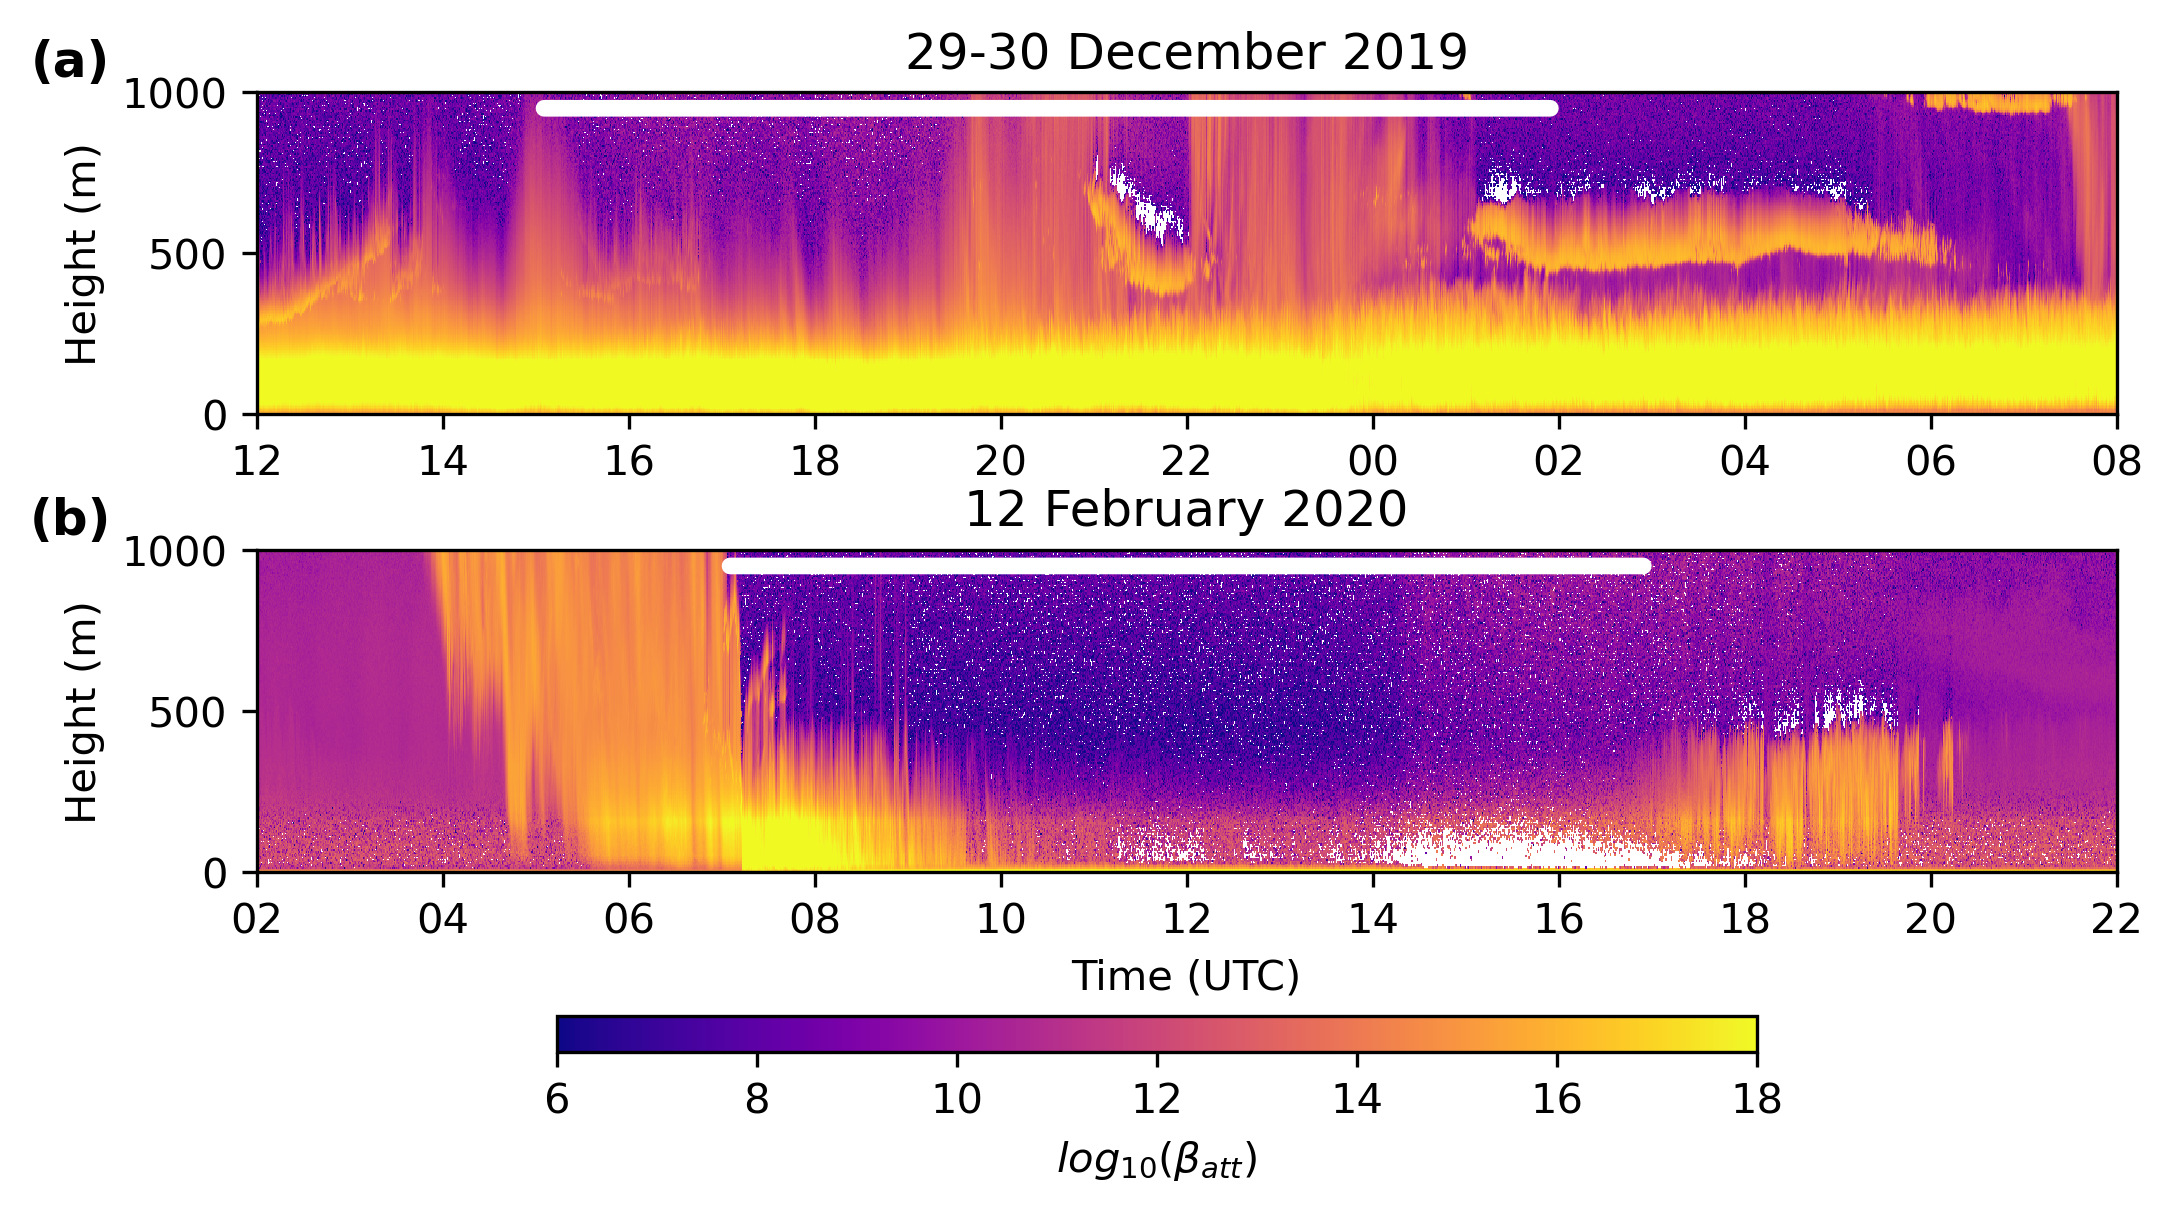

In [75]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Load data for the three dates (files saved daily)

datafile = 'c://temp/20191229_Emerado ND_CHM140002_000.nc'
DS = xr.open_dataset(datafile)
data = DS.beta_raw
data = data.transpose()
data = np.log(data)
data_122919 = data.sortby(data.time)

datafile = 'c://temp/20191230_Emerado ND_CHM140002_000.nc'
DS = xr.open_dataset(datafile)
data = DS.beta_raw
data = data.transpose()
data = np.log(data)
data_123019 = data.sortby(data.time)

data_dec2019=xr.concat([data_122919,data_123019],dim='time')

datafile = 'c://temp/2020/20200212_Emerado ND_CHM140002_000.nc'
DS = xr.open_dataset(datafile)
data = DS.beta_raw
data = data.transpose()
data = np.log(data)
data_021220 = data.sortby(data.time)

#CREATE the Figure
fig=plt.figure(figsize=(8,4),dpi=300)

ax1 = fig.add_subplot(211) 
dec29 = data_dec2019.plot(cmap='plasma',vmin=6, vmax=18,add_colorbar=False)
plt.xlim(left=datetime.datetime(2019, 12, 29, hour=12),right=datetime.datetime(2019, 12, 30, hour=8))
ax1.annotate("",xy=(0.15, 0.95), xycoords='axes fraction',xytext=(0.7, 0.95), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="-",connectionstyle="arc3, rad=0",color="white",lw=4))

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H'),)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_horizontalalignment('center')
plt.xticks(rotation=0)
plt.ylim(0, 1000)
plt.ylabel('Height (m)')
plt.xlabel('')
plt.title('29-30 December 2019')
ax1.text(-.1, 1.05,'(a)',horizontalalignment='center',fontsize=12,transform=ax1.transAxes,weight='bold')

ax2 = fig.add_subplot(212)
feb12 = data_021220.plot(cmap='plasma',vmin=6, vmax=18,add_colorbar=False)
plt.xlim(left=datetime.datetime(2020, 2, 12, hour=2),right=datetime.datetime(2020, 2, 12, hour=22))
ax2.annotate("",xy=(0.25, 0.95), xycoords='axes fraction',xytext=(0.75, 0.95), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="-",connectionstyle="arc3, rad=0",color="white",lw=4))

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H'),)
for tick in ax2.xaxis.get_major_ticks():
    tick.label1.set_horizontalalignment('center')
plt.xticks(rotation=0)
plt.ylim(0, 1000)
plt.ylabel('Height (m)')
plt.xlabel('Time (UTC)')
plt.title('12 February 2020')
ax2.text(-0.1, 1.05,'(b)',horizontalalignment='center',fontsize=12,transform=ax2.transAxes,weight='bold')

#Move plots to make room for colorbar
fig.subplots_adjust(hspace=0.42,bottom = 0.23)
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cbar = fig.colorbar(feb12, cax=cbar_ax,orientation='horizontal')
cbar.set_label(r'$log_{10}(\beta_{att})$')
#plt.tight_layout
plt.show()

In [22]:
data_dec2019

<xarray.DataArray 'beta_raw' (range: 1602, time: 11520)>
array([[15.015477, 15.015478, 14.989067, ..., 14.960637, 14.927462,
        14.930778],
       [14.694475, 14.689945, 14.736816, ..., 13.398068, 13.444014,
        13.350607],
       [14.772907, 14.901537, 14.922011, ..., 11.706403, 10.324652,
        11.645371],
       ...,
       [13.608221,       nan,       nan, ...,       nan,  9.24422 ,
        12.83579 ],
       [12.061606,       nan, 13.078274, ..., 12.861188,       nan,
        11.829859],
       [      nan, 10.617687, 13.139529, ...,       nan, 13.489073,
              nan]], dtype=float32)
Coordinates:
  * range    (range) float32 4.995 9.99 14.985 19.98 ... 7992.0 7996.995 8001.99
  * time     (time) datetime64[ns] 2019-12-29T00:00:03 ... 2019-12-30T23:59:49